In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('US_Accidents_March23.csv', nrows=300000)

In [3]:
# Explore data
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Data Cleaning
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  300000
End_Lng                  300000
Distance(mi)                  0
Description                   0
Street                        0
City                         16
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          2470
Temperature(F)             4356
Wind_Chill(F)            264385
Humidity(%)                4807
Pressure(in)               3513
Visibility(mi)             6663
Wind_Direction             2484
Wind_Speed(mph)           57754
Precipitation(in)        270964
Weather_Condition          6131
Amenity                       0
Bump                          0
Crossing

In [5]:
print(df.shape)

# Find columns with null percentage greater than 80%
null_percentage_threshold = 80
high_null_columns = df.columns[df.isnull().mean() * 100 > null_percentage_threshold]

print("\nColumns with null percentage greater than 80%:")
print(high_null_columns)

# Remove columns with null percentage greater than 80%
df = df.drop(columns=high_null_columns)

print(df.shape)

(300000, 46)

Columns with null percentage greater than 80%:
Index(['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], dtype='object')
(300000, 42)


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [7]:
# Drop ID column
df.drop(columns = ['ID', 
                   'Description', 
                   'Airport_Code', 
                   'County', 
                   'City', 
                   'Country', 
                   'Wind_Direction', 
                   'Amenity',
                   'Weather_Timestamp', 
                   'Timezone', 
                   'Give_Way', 
                   'Station', 
                   'Stop', 
                   'No_Exit'], inplace = True)

In [8]:
# removing rows with null values
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(300000, 28)
(238739, 28)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238739 entries, 2 to 299999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 238739 non-null  object 
 1   Severity               238739 non-null  int64  
 2   Start_Time             238739 non-null  object 
 3   End_Time               238739 non-null  object 
 4   Start_Lat              238739 non-null  float64
 5   Start_Lng              238739 non-null  float64
 6   Distance(mi)           238739 non-null  float64
 7   Street                 238739 non-null  object 
 8   State                  238739 non-null  object 
 9   Zipcode                238739 non-null  object 
 10  Temperature(F)         238739 non-null  float64
 11  Humidity(%)            238739 non-null  float64
 12  Pressure(in)           238739 non-null  float64
 13  Visibility(mi)         238739 non-null  float64
 14  Wind_Speed(mph)        238739 non-nu

In [12]:
df_xg = df.copy()
df_xg.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,OH,45176,36.0,100.0,29.67,10.0,3.5,Overcast,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,OH,45417,35.1,96.0,29.64,9.0,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,OH,45459,36.0,89.0,29.65,6.0,3.5,Mostly Cloudy,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Westerville Rd,OH,43081,37.9,97.0,29.63,7.0,3.5,Light Rain,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,N Woodward Ave,OH,45417-2476,34.0,100.0,29.66,7.0,3.5,Overcast,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Data Preprocessing

In [60]:
# encoding categorical data
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Source', 'Start_Time', 'End_Time', 'Street', 'State', 'Zipcode',
       'Weather_Condition', 'Bump', 'Crossing', 'Junction', 'Railway',
       'Roundabout', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [61]:
from sklearn import preprocessing

# for i in categorical_columns:
#     en = preprocessing.LabelEncoder()
#     df[i]= en.fit_transform(df[i])

label_encoders = {}

# Encoding categorical columns
for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [62]:
df.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,0,2,0,0,39.063148,-84.032608,0.01,25461,18,18863,36.0,100.0,29.67,10.0,3.5,40,0,0,0,0,0,0,1,0,1,1,0,0
3,0,3,1,1,39.747753,-84.205582,0.01,12598,18,19677,35.1,96.0,29.64,9.0,4.6,37,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2,2,2,39.627781,-84.188354,0.01,16046,18,20036,36.0,89.0,29.65,6.0,3.5,37,0,0,0,0,0,0,1,0,0,0,0,0
5,0,3,3,3,40.100590,-82.925194,0.01,29437,18,18196,37.9,97.0,29.63,7.0,3.5,27,0,0,0,0,0,0,0,0,0,0,0,0
6,0,2,4,4,39.758274,-84.230507,0.00,18145,18,19718,34.0,100.0,29.66,7.0,3.5,40,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# Decoding back to original values
decoded_df = df.copy()
for col in categorical_columns:
    # Use the mapping of classes to their original values
    decoded_df[col] = label_encoders[col].inverse_transform(df[col])

decoded_df.head() 

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,OH,45176,36.0,100.0,29.67,10.0,3.5,Overcast,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,OH,45417,35.1,96.0,29.64,9.0,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,OH,45459,36.0,89.0,29.65,6.0,3.5,Mostly Cloudy,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Westerville Rd,OH,43081,37.9,97.0,29.63,7.0,3.5,Light Rain,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,N Woodward Ave,OH,45417-2476,34.0,100.0,29.66,7.0,3.5,Overcast,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Feature importance

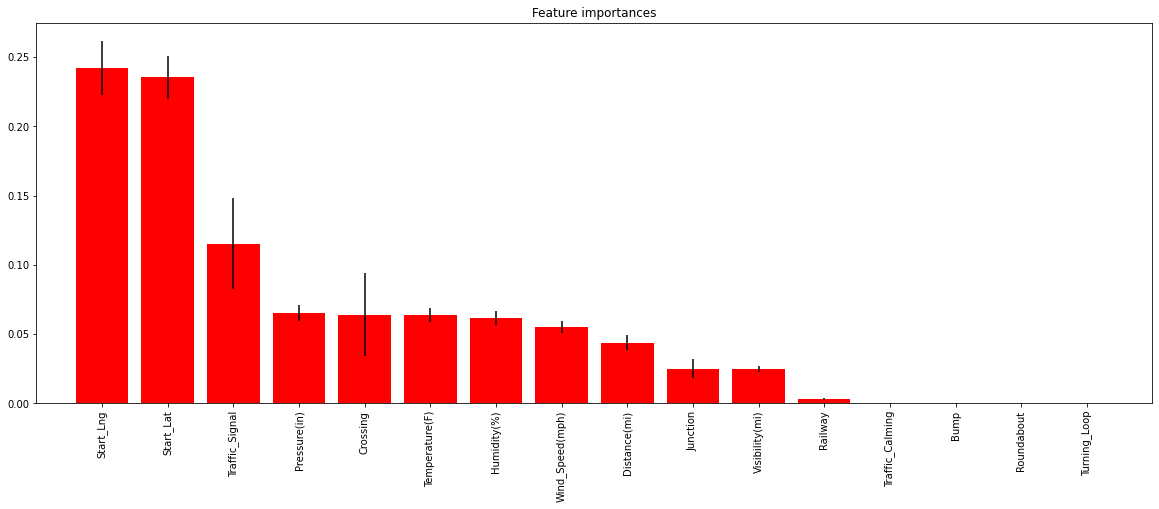

In [64]:
train_y = df['Severity'].values

# create a list x_cols containing all column names except 'Severity' where the column data type is either float64 or int64. Then, a new DataFrame train_col is created with only the selected columns.
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

feature_name = train_col.columns.values 


# Build Extra Trees Regressor Model:
from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)

# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of the trees.
# max_features: The number of features to consider when looking for the best split.
# n_jobs: Number of jobs to run in parallel (set to -1 to use all available processors).
# random_state: Seed for reproducibility.

importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)

# Sort and Select Top Features:
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


Train Test Split

In [65]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()
column_names = X.columns

In [66]:
column_names

Index(['Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Street', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Bump', 'Crossing', 'Junction', 'Railway',
       'Roundabout', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [67]:
y.unique()

array([2, 3, 1, 4], dtype=int64)

In [68]:
# If y represents a categorical variable with integer encoding (e.g., classes 1, 2, 3, ...), subtracting 1 effectively shifts the encoding to start from 0. This can be useful because some machine learning models or libraries (like scikit-learn) expect class labels to start from 0.
y = y-1
y.unique()

array([1, 2, 0, 3], dtype=int64)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
import os
import joblib

scaler = StandardScaler()
X = scaler.fit_transform(X)

directory_path = 'smoteData'

scaler_filename = 'scaler.joblib'
scaler_filepath = os.path.join(directory_path, scaler_filename)

joblib.dump(scaler, scaler_filepath)

# Load the scaler
# loaded_scaler = joblib.load(scaler_filepath)
# X_original = loaded_scaler.inverse_transform(X_scaled)

In [93]:
X

array([[-0.08044391, -1.72476715, -1.73265348, ...,  1.90336095,
        -0.45233699, -0.39270227],
       [-0.08044391, -1.72475247, -1.73263861, ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391, -1.72473778, -1.73262374, ..., -0.52538642,
        -0.45233699, -0.39270227],
       ...,
       [-0.08044391, -0.30881973, -0.30723533, ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391, -0.30884911, -0.30708663, ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391, -0.30876098, -0.30681897, ..., -0.52538642,
        -0.45233699, -0.39270227]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)
X_train.shape
# X_test.shape

(190991, 27)

In [95]:
X_train

array([[-0.08044391, -0.13813642, -0.1401881 , ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391, -1.29100153, -1.29015824, ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391, -0.76220784, -0.75881601, ..., -0.52538642,
        -0.45233699, -0.39270227],
       ...,
       [-0.08044391,  1.34195127,  1.3441293 , ..., -0.52538642,
        -0.45233699, -0.39270227],
       [-0.08044391,  0.76258856,  0.76002904, ...,  1.90336095,
         2.21074114,  2.54645841],
       [-0.08044391, -1.150266  , -1.14798817, ..., -0.52538642,
        -0.45233699, -0.39270227]])

In [96]:
y_train

286163    1
43444     1
88170     2
26571     1
233687    1
         ..
87950     1
103734    1
267410    1
74188     2
46763     2
Name: Severity, Length: 190991, dtype: int64

MODEL

In [74]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [97]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
4775/4775 [==============================] - 27s 5ms/step - loss: 0.5024 - accuracy: 0.7687 - val_loss: 0.4640 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 2/100
4775/4775 [==============================] - 24s 5ms/step - loss: 0.4543 - accuracy: 0.8004 - val_loss: 0.4437 - val_accuracy: 0.8078 - lr: 0.0010
Epoch 3/100
4775/4775 [==============================] - 25s 5ms/step - loss: 0.4402 - accuracy: 0.8082 - val_loss: 0.4324 - val_accuracy: 0.8151 - lr: 0.0010
Epoch 4/100
4775/4775 [==============================] - 24s 5ms/step - loss: 0.4283 - accuracy: 0.8174 - val_loss: 0.4249 - val_accuracy: 0.8224 - lr: 0.0010
Epoch 5/100
4775/4775 [==============================] - 25s 5ms/step - loss: 0.4173 - accuracy: 0.8254 - val_loss: 0.4180 - val_accuracy: 0.8274 - lr: 0.0010
Epoch 6/100
4775/4775 [==============================] - 25s 5ms/step - loss: 0.4089 - accuracy: 0.8295 - val_loss: 0.4087 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 7/100
4775/4775 [=======================

In [98]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.8461715579032898


In [99]:
# Save the model
model.save("model_original")

INFO:tensorflow:Assets written to: model_original\assets


INFO:tensorflow:Assets written to: model_original\assets


In [100]:
losses=pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.502355,0.768654,0.463979,0.793604,0.001
1,0.454281,0.800409,0.443705,0.807845,0.001
2,0.440198,0.808232,0.432438,0.815113,0.001
3,0.428297,0.817442,0.424903,0.822359,0.001
4,0.417259,0.825353,0.417999,0.827406,0.001


<AxesSubplot:>

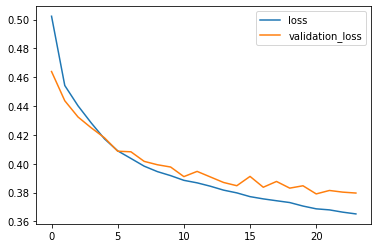

In [101]:
l = pd.DataFrame({'loss':losses['loss'], 'validation_loss':losses['val_loss']})
l.plot()

MARKDOWN

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
#SMOTE

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [104]:
X_train_smote.shape

(481632, 27)

In [105]:
y_train_smote

0         1
1         1
2         2
3         1
4         1
         ..
481627    3
481628    3
481629    3
481630    3
481631    3
Name: Severity, Length: 481632, dtype: int64

In [106]:
X_test_scaled.shape

(47748, 27)

In [107]:
y_train

286163    1
43444     1
88170     2
26571     1
233687    1
         ..
87950     1
103734    1
267410    1
74188     2
46763     2
Name: Severity, Length: 190991, dtype: int64

In [108]:
# Create the directory if it doesn't exist
import os

save_dir = 'smoteData'
os.makedirs(save_dir, exist_ok=True)

In [109]:
# Save train data
train_data_smote = pd.concat([pd.DataFrame(X_train_smote, columns = column_names), pd.Series(y_train_smote, name='Severity')], axis=1)
train_data_smote.to_csv(os.path.join(save_dir, 'train_data_smote2.csv'), index=False)

print(train_data_smote.shape)
print(X_train_smote.shape)
print(y_train_smote.shape)

train_data_smote.head()

(481632, 28)
(481632, 27)
(481632,)


,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,-0.080444,-0.138136,-0.140188,-0.616508,0.019179,-0.071447,1.739401,1.525240,0.186183,1.567621,-1.422826,-0.193487,0.337568,-0.071632,0.888202,-0.016629,2.449011,-0.2632,-0.096418,-0.00614,-0.030023,1.813796,0.0,-0.596568,-0.525386,-0.452337,-0.392702,1
1,-0.080444,-1.291002,-1.290158,-0.359440,-1.139359,-0.071447,-0.950876,-1.011204,0.900914,0.215772,0.208636,-0.193487,0.337568,0.118945,-1.132222,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,1.676254,-0.525386,-0.452337,-0.392702,1
2,-0.080444,-0.762208,-0.758816,-0.399041,-1.156722,-0.071447,-0.340781,-1.011204,0.803977,0.571215,-0.079269,-0.313362,0.337568,0.118945,-1.132222,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,2
3,-0.080444,-0.764161,-0.760600,0.396250,-1.389954,-0.071447,-0.267781,-1.011204,1.148168,0.227426,-0.127253,-0.393278,0.337568,0.517425,0.942808,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,1
4,-0.080444,1.360869,1.363148,0.918654,1.194695,-0.071447,1.364801,1.179361,-1.199798,-1.672155,1.744130,1.404844,-3.375670,-0.071632,0.178323,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,1


In [110]:
# Save test data
# test_data_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns = column_names), pd.Series(y_test, name='Target')], axis=1)
# test_data_scaled.to_csv(os.path.join(save_dir, 'test_data_scaled1.csv'), index=False)

y_test_array = np.array(y_test).astype(int)

# Save test data
test_data_combined = np.concatenate([X_test_scaled, y_test_array[:, np.newaxis]], axis=1)

# Create a DataFrame with column names
column_names_with_target = np.append(column_names, 'Severity')
test_data_scaled = pd.DataFrame(test_data_combined, columns=column_names_with_target)
test_data_scaled['Severity'] = test_data_scaled['Severity'].astype(int)  # Convert 'Severity' column to integer
test_data_scaled.to_csv(os.path.join(save_dir, 'test_data_scaled2.csv'), index=False)


print(test_data_scaled.shape)
print(X_test_scaled.shape)
print(y_test.shape)

test_data_scaled.head()

[1 2 2 ... 1 1 2]
[[-0.08044391 -0.37068344 -0.36736876 ... -0.45233699 -0.39270227
   1.        ]
 [-0.08044391 -1.42343862 -1.42397149 ... -0.45233699 -0.39270227
   2.        ]
 [-0.08044391 -1.34158524 -1.34171181 ... -0.45233699 -0.39270227
   2.        ]
 ...
 [-0.08044391  1.71018132  1.71310829 ... -0.45233699 -0.39270227
   1.        ]
 [-0.08044391  1.30091442  1.30286563 ... -0.45233699 -0.39270227
   1.        ]
 [-0.08044391  0.74217295  0.73946412 ... -0.45233699 -0.39270227
   2.        ]]
(47748, 28)
(47748, 27)
(47748,)


,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,-0.080444,-0.370683,-0.367369,0.878135,1.153040,-0.071447,-0.216694,1.179361,-1.400602,1.223832,-1.374842,0.086221,0.337568,1.123808,-1.132222,-0.016629,2.449011,-0.2632,-0.096418,-0.00614,-0.030023,1.813796,0.0,-0.596568,-0.525386,-0.452337,-0.392702,1
1,-0.080444,-1.423439,-1.423971,-0.421880,-1.153687,-0.056727,0.225613,-1.011204,0.854692,-0.349440,0.928399,-0.073612,0.337568,-0.868592,0.888202,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,1.676254,1.903361,-0.452337,-0.392702,2
2,-0.080444,-1.341585,-1.341712,1.120886,0.068206,-0.071447,0.876331,0.602896,0.060005,0.751850,0.640494,-1.152485,0.337568,-0.279535,0.724384,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,2
3,-0.080444,-0.750296,-0.746697,1.103305,0.070336,-0.071447,-0.408487,0.602896,0.095261,0.658619,1.168320,-0.792861,0.337568,-0.470112,0.724384,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,1
4,-0.080444,-0.994006,-0.990740,-2.033805,0.940582,-0.071447,-0.310128,-0.550033,-0.816314,1.276274,-0.031285,0.206096,0.337568,0.326848,0.724384,-0.016629,-0.408328,-0.2632,-0.096418,-0.00614,-0.030023,-0.551330,0.0,-0.596568,-0.525386,-0.452337,-0.392702,2


In [111]:
inputs_smote = tf.keras.Input(shape=(X_train_scaled.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs_smote)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs_smote = tf.keras.layers.Dense(4, activation='softmax')(x)

model_smote = tf.keras.Model(inputs_smote, outputs_smote)

model_smote.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100

history_smote = model_smote.fit(
    X_train_smote,
    y_train_smote,
    validation_data=(X_test_scaled, y_test),  # Use original test data for validation
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

print("Test Accuracy:", model_smote.evaluate(X_test_scaled, y_test, verbose=0)[1])

Epoch 1/100
12041/12041 [==============================] - 77s 6ms/step - loss: 0.4174 - accuracy: 0.8231 - val_loss: 0.5925 - val_accuracy: 0.7412 - lr: 0.0010
Epoch 2/100
12041/12041 [==============================] - 77s 6ms/step - loss: 0.3039 - accuracy: 0.8648 - val_loss: 0.5906 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 3/100
12041/12041 [==============================] - 84s 7ms/step - loss: 0.2838 - accuracy: 0.8721 - val_loss: 0.5645 - val_accuracy: 0.7652 - lr: 0.0010
Epoch 4/100
12041/12041 [==============================] - 71s 6ms/step - loss: 0.2734 - accuracy: 0.8761 - val_loss: 0.5508 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 5/100
12041/12041 [==============================] - 85s 7ms/step - loss: 0.2665 - accuracy: 0.8792 - val_loss: 0.5459 - val_accuracy: 0.7720 - lr: 0.0010
Epoch 6/100
12041/12041 [==============================] - 72s 6ms/step - loss: 0.2613 - accuracy: 0.8811 - val_loss: 0.5520 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 7/100
12041/12041 [=========

In [112]:
# Save the model
model_smote.save("model_smote_1")

INFO:tensorflow:Assets written to: model_smote_1\assets


INFO:tensorflow:Assets written to: model_smote_1\assets


In [113]:
# model with all cols

inputs_smote_all = tf.keras.Input(shape=(train_data_smote.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs_smote_all)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs_smote_all = tf.keras.layers.Dense(4, activation='softmax')(x)

model_smote_all = tf.keras.Model(inputs_smote_all, outputs_smote_all)

model_smote_all.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100

history_smote_all = model_smote_all.fit(
    train_data_smote,
    y_train_smote,
    validation_data=(test_data_scaled, y_test),  # Use original test data for validation
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

print("Test Accuracy:", model_smote_all.evaluate(test_data_scaled, y_test, verbose=0)[1])

Epoch 1/100
12041/12041 [==============================] - 59s 5ms/step - loss: 0.0151 - accuracy: 0.9961 - val_loss: 0.0024 - val_accuracy: 0.9991 - lr: 0.0010
Epoch 2/100
12041/12041 [==============================] - 56s 5ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 3/100
12041/12041 [==============================] - 58s 5ms/step - loss: 9.0886e-04 - accuracy: 0.9998 - val_loss: 0.0035 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 4/100
12041/12041 [==============================] - 57s 5ms/step - loss: 7.8541e-04 - accuracy: 0.9998 - val_loss: 5.6373e-04 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 5/100
12041/12041 [==============================] - 56s 5ms/step - loss: 8.9288e-04 - accuracy: 0.9998 - val_loss: 0.0030 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 6/100
12041/12041 [==============================] - 57s 5ms/step - loss: 6.8239e-04 - accuracy: 0.9999 - val_loss: 4.1404e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 7/10

In [115]:
# Save the model
model_smote_all.save("model_smote_all")

INFO:tensorflow:Assets written to: model_smote_all\assets


INFO:tensorflow:Assets written to: model_smote_all\assets
